#  <center>**Maestría en Ciencia de Datos y Analítica**</center>
## <center>**Algebra de Datos: Trabajo 3**</center>
### <center>**Autor**:</center>
#### <center>**Sebastian Carvalho Salazar**</center>
#### <center>**Johan Stiven Paez Bermudez**</center>
#### <center>**Sebastian Ramirez Escobar**</center>

## Análisis de Texto con NMF

1. Importación de bibliotecas: Se importan las bibliotecas necesarias, incluyendo sklearn, matplotlib, nltk y pandas.

2. Descarga de recursos lingüísticos: Utiliza la biblioteca nltk para descargar recursos lingüísticos, como listas de stopwords en español e inglés y el lematizador WordNet.

3. Carga de datos: Se cargan tres conjuntos de datos desde archivos de texto separados por tabulaciones y se concatenan en un solo DataFrame llamado 'df'. Luego, se realiza una reordenación aleatoria de las filas en el DataFrame.

4. Preprocesamiento de texto: Se define una función llamada `clean_text` que realiza una serie de pasos de preprocesamiento de texto, como convertir el texto a minúsculas, eliminar caracteres especiales, tokenizar el texto, eliminar stopwords y lematizar las palabras.

5. Limpieza de texto: La función `clean_text` se aplica a la columna 'CONCORDANCIA' del DataFrame 'df' para limpiar el texto.

6. Representación TF-IDF: Utiliza el modelo TF-IDF para representar el texto limpio como una matriz numérica, donde cada fila representa un documento y cada columna representa una palabra en el vocabulario. Se configuran parámetros como el número máximo de características, la frecuencia mínima y máxima de documentos y el rango de n-gramas.

7. Descomposición NMF: Realiza una descomposición de matriz no negativa (NMF) en la matriz TF-IDF para identificar patrones o "temas" en los datos de texto. Se especifica un número de temas igual a 9.

8. Visualización de temas: Define una función llamada `plot_top_words` que crea un gráfico de barras para mostrar las palabras más importantes asociadas a cada tema identificado por NMF. El gráfico se organiza en una cuadrícula de 3x3 y muestra las palabras más importantes para cada tema.

9. Llamada a la función: Se llama a la función `plot_top_words` para visualizar los temas identificados en los datos de texto.

En resumen, este script realiza una limpieza y análisis de texto en un conjunto de datos que contiene información sobre **acústica, electrónica y vibración**. Luego, utiliza la descomposición NMF para identificar patrones o temas en los datos y visualiza las palabras más importantes asociadas a cada tema.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SEBASTIAN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SEBASTIAN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SEBASTIAN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


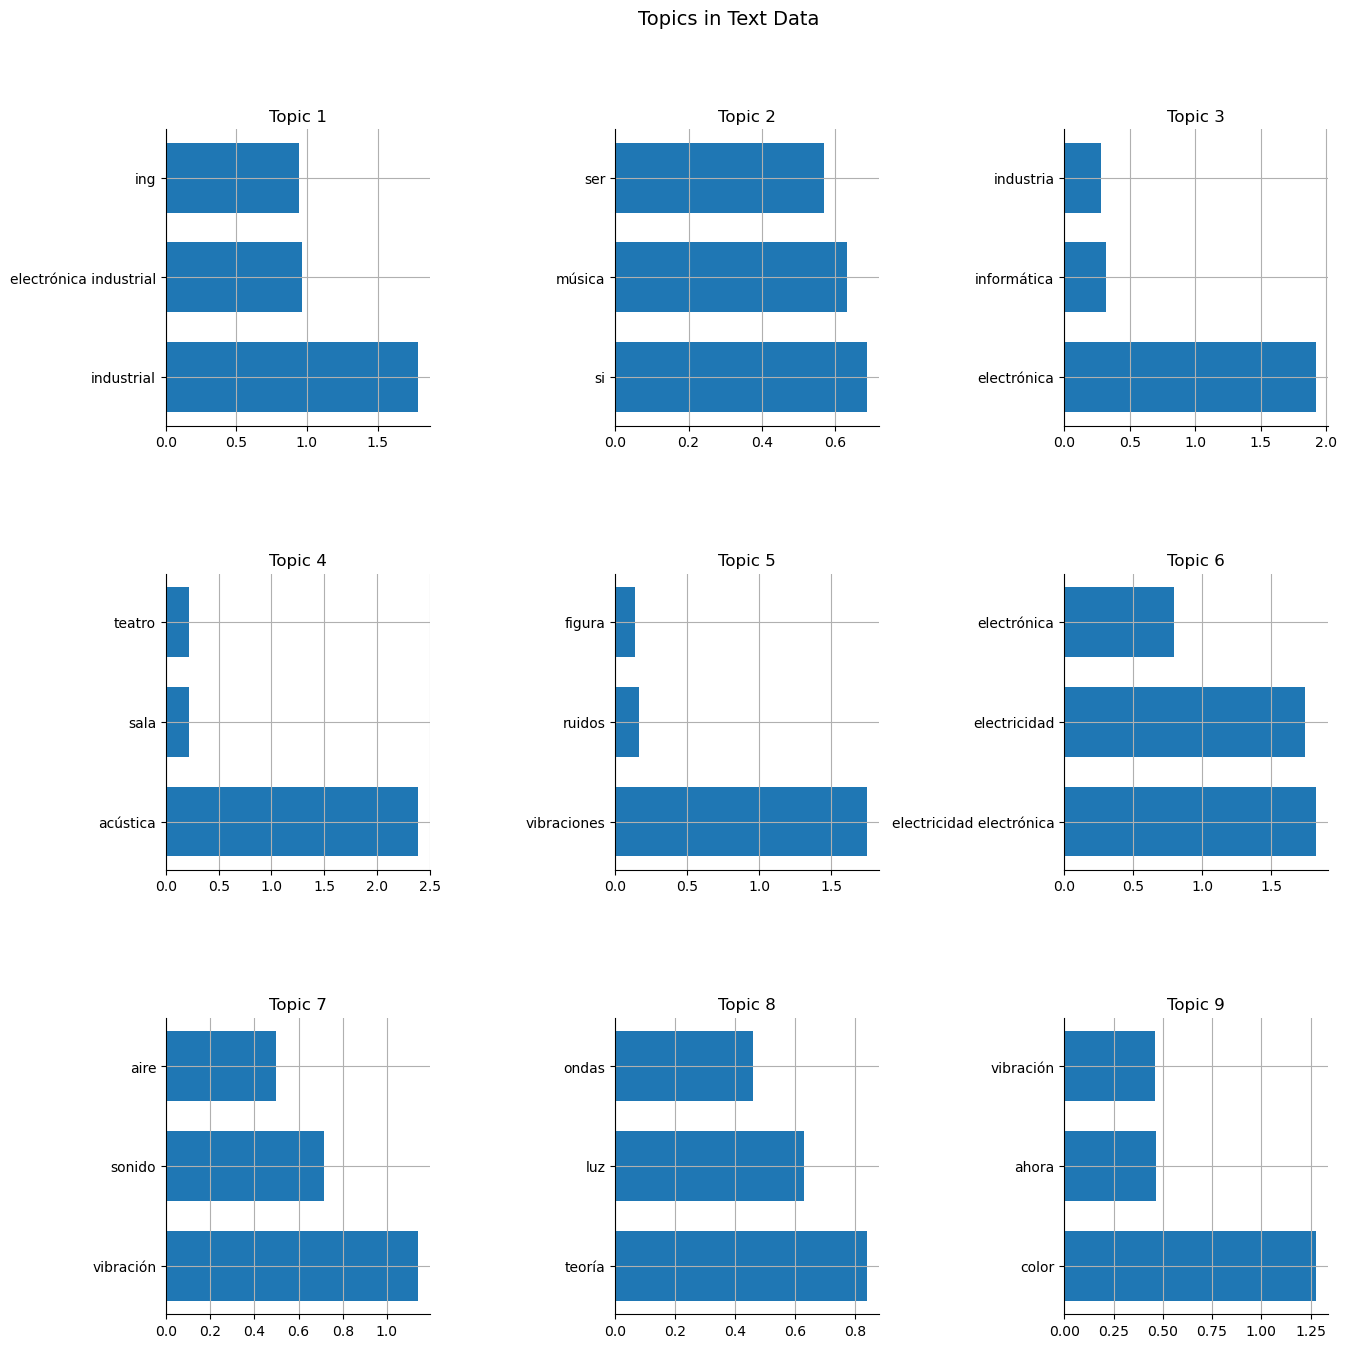

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import pandas as pd
import string
import nltk

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

path1 = './Data/ExportacionCREAtsv_Acústica.txt'
acustica = pd.read_csv(path1, sep="\t")

path2 = './Data/ExportacionCREAtsv_Electrónica.txt'
electronica = pd.read_csv(path2, sep="\t")

path3 = './Data/ExportacionCREAtsv_Vibración.txt'
vibracion = pd.read_csv(path3, sep="\t")

# Concatenar los tres DataFrames en uno solo
df = pd.concat([acustica, electronica, vibracion], ignore_index=True)
df = df.sample(len(df))

def clean_text(text):
    # Eliminar caracteres especiales y convertir a minúsculas
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])

    # Tokenización
    tokens = nltk.word_tokenize(text)

    # Eliminar stopwords en español e inglés
    stop_words = set(stopwords.words('spanish') + stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lematización
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return ' '.join(tokens)

# Aplicar la función a la columna 'CONCORDANCIA'
df['CONCORDANCIA_CLEAN'] = df['CONCORDANCIA'].apply(clean_text)

tfidf_vectorizer = TfidfVectorizer(max_features=1000, min_df=10, max_df=0.95, ngram_range=(1,2))
tfidf_matrix = tfidf_vectorizer.fit_transform(df['CONCORDANCIA_CLEAN'])

n_topics = 9
nmf = NMF(n_components=n_topics, random_state=42)
nmf.fit(tfidf_matrix)

def plot_top_words(model, feature_names, n_top_words, n_topics, title):
    fig, axes = plt.subplots(3, 3, figsize=(15, 15), sharey=False)
    axes = axes.flatten()

    for topic_idx, ax in enumerate(axes):
        if topic_idx < n_topics:
            topic = model.components_[topic_idx]
            top_features_ind = topic.argsort()[-n_top_words:]
            top_features = feature_names[top_features_ind]
            weights = topic[top_features_ind]

            ax.barh(top_features, weights, height=0.7)
            ax.set_title(f"Topic {topic_idx + 1}", fontsize=12)
            ax.invert_yaxis()
            ax.tick_params(axis="both", which="major", labelsize=10)
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.grid(True)

    for i in range(n_topics, len(axes)):
        fig.delaxes(axes[i])  # Eliminar subplots adicionales

    fig.suptitle(title, fontsize=14)
    plt.subplots_adjust(top=0.9, wspace=0.7, hspace=0.5)
    plt.show()

# Llamar a la función para crear el gráfico de barras
plot_top_words(nmf, tfidf_vectorizer.get_feature_names_out(), n_top_words=3, n_topics=n_topics, title="Topics in Text Data")